<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/assignment4/Assignment4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
file_path = '/content/drive/My Drive/DataSets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
housing.shape

(545, 13)

In [24]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [25]:
# List of variables to map, yes/no variables to 0/1 variables

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#df_train = training set, #df_test = testset
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#num_vars_with_y = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
#df_train[num_vars_with_y] = scaler.fit_transform(df_train[num_vars_with_y])
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,7840000,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [28]:
y_train = df_train.pop('price') # price is the ground truth
X_train = df_train #X_train is the actual training set
X_train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [29]:
#make the whole input values to an numpy array
m_train=len(y_train)
X_0_train = np.ones((m_train, 1))
X_0_train[:5]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [30]:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
area_train =  X_train.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_train =  X_train.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_train =  X_train.values[:, 2]  # get input values from third column -- X_train is a list here
stories_train =  X_train.values[:, 3]  # get input values from fourth column -- X_train is a list here
mainroad_train =  X_train.values[:, 4]  # get input values from fourth column -- X_train is a list here
guestroom_train =  X_train.values[:, 5]  # get input values from fourth column -- X_train is a list here
basement_train =  X_train.values[:, 6]  # get input values from fourth column -- X_train is a list here
hotwaterheating_train =  X_train.values[:, 7]  # get input values from fourth column -- X_train is a list here
airconditioning_train =  X_train.values[:, 8]  # get input values from fourth column -- X_train is a list here
parking_train =  X_train.values[:, 9]  # get input values from fifth column -- X_train is a list here
prefarea_train =  X_train.values[:, 10]  # get input values from fourth column -- X_train is a list here

In [31]:
#getting the whole inputmatrix
area_train = area_train.reshape(m_train, 1)
bedrooms_train = bedrooms_train.reshape(m_train, 1)
bathrooms_train = bathrooms_train.reshape(m_train, 1)
stories_train = stories_train.reshape(m_train, 1)
mainroad_train = mainroad_train.reshape(m_train, 1)
guestroom_train = guestroom_train.reshape(m_train, 1)
basement_train = basement_train.reshape(m_train,1)
hotwaterheating_train = hotwaterheating_train.reshape(m_train,1)
airconditioning_train = airconditioning_train.reshape(m_train,1)
parking_train = parking_train.reshape(m_train, 1)
prefarea_train = prefarea_train.reshape(m_train,1)
#putting it all in one matrix
input_matrix_train = np.hstack((X_0_train, area_train, bedrooms_train, bathrooms_train, stories_train,mainroad_train,guestroom_train,basement_train,hotwaterheating_train,airconditioning_train,  parking_train, prefarea_train))
input_matrix_train[:5]


array([[1.0, 1.351872744762053, 0.07867900976283945, -0.5798965849223422,
        -0.9290230516572452, 1, 1, 1, 0, 1, 0.3114843319204056, 0],
       [1.0, 0.5653262733536397, 0.07867900976283945, 1.4109294861496353,
        2.474792498952494, 1, 0, 0, 0, 1, -0.8492606998513623, 1],
       [1.0, 0.746836997524812, -1.2934829205010796, -0.5798965849223422,
        -0.9290230516572452, 1, 1, 1, 0, 0, 1.4722293636921735, 1],
       [1.0, 0.5932510001492046, 0.07867900976283945,
        -0.5798965849223422, -0.9290230516572452, 1, 0, 1, 0, 1,
        -0.8492606998513623, 1],
       [1.0, -0.7052487958445668, 1.4508409400267586,
        -0.5798965849223422, 0.20558213187933447, 1, 0, 0, 0, 0,
        2.6329743954639415, 0]], dtype=object)

In [32]:
#doing the same for testset
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#df_test[num_vars_with_y] = scaler.fit_transform(df_test[num_vars_with_y])
df_test.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,semi-furnished
54,7350000,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,semi-furnished
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,semi-furnished
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,semi-furnished
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,semi-furnished


In [33]:
y_test = df_test.pop('price') # price is the ground truth
X_test = df_test #X_train is the actual training set
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,semi-furnished
54,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,semi-furnished
171,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,semi-furnished
244,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,semi-furnished
268,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,semi-furnished


In [34]:
#make the whole input values to an numpy array
#area, bedrooms, bathrooms, stories, parking
m_test=len(y_test)
X_0_test = np.ones((m_test, 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [35]:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
area_test =  X_test.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_test =  X_test.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_test =  X_test.values[:, 2]  # get input values from third column -- X_train is a list here
stories_test =  X_test.values[:, 3]  # get input values from fourth column -- X_train is a list here
mainroad_test =  X_test.values[:, 4]  # get input values from fourth column -- X_train is a list here
guestroom_test =  X_test.values[:, 5]  # get input values from fourth column -- X_train is a list here
basement_test =  X_test.values[:, 6]  # get input values from fourth column -- X_train is a list here
hotwaterheating_test =  X_test.values[:, 7]  # get input values from fourth column -- X_train is a list here
airconditioning_test =  X_test.values[:, 8]  # get input values from fourth column -- X_train is a list here
parking_test =  X_test.values[:, 9]  # get input values from fifth column -- X_train is a list here
prefarea_test =  X_test.values[:, 10]  # get input values from fourth column -- X_train is a list here

In [36]:
#getting the whole inputmatrix
area_test = area_test.reshape(m_test, 1)
bedrooms_test = bedrooms_test.reshape(m_test, 1)
bathrooms_test = bathrooms_test.reshape(m_test, 1)
stories_test = stories_test.reshape(m_test, 1)
mainroad_test = mainroad_test.reshape(m_test, 1)
guestroom_test = guestroom_test.reshape(m_test, 1)
basement_test = basement_test.reshape(m_test,1)
hotwaterheating_test = hotwaterheating_test.reshape(m_test,1)
airconditioning_test = airconditioning_test.reshape(m_test,1)
parking_test = parking_test.reshape(m_test, 1)
prefarea_test = prefarea_test.reshape(m_test,1)
#putting it all in one matrix
input_matrix_test = np.hstack((X_0_test, area_test, bedrooms_test, bathrooms_test, stories_test,mainroad_test,guestroom_test,basement_test,hotwaterheating_test,airconditioning_test,  parking_test, prefarea_test))
input_matrix_test[:5]

array([[1.0, -1.0209532657669225, -0.07202305106510169,
        -0.5317745096552029, 0.3084153721098439, 1, 0, 0, 0, 0,
        -0.6437427761961775, 1],
       [1.0, 0.369176602797588, -0.07202305106510169, 1.4669641645660771,
        0.3084153721098439, 1, 1, 0, 0, 1, 0.545544725589981, 0],
       [1.0, 2.2712485287276825, -0.07202305106510169,
        -0.5317745096552029, -0.9366689078891551, 1, 0, 0, 0, 0,
        0.545544725589981, 1],
       [1.0, 0.06619958016173316, -0.07202305106510169,
        -0.5317745096552029, 0.3084153721098439, 1, 1, 1, 0, 0,
        -0.6437427761961775, 1],
       [1.0, -0.0986555645077761, 1.2363957099509097,
        -0.5317745096552029, 0.3084153721098439, 1, 0, 0, 0, 1,
        -0.6437427761961775, 0]], dtype=object)

In [37]:

# Create a PCA instance and specify the number of components to retain
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVR

# Fit regression model
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(input_matrix_train, y_train).predict(input_matrix_test)

In [38]:
loss_lin = metrics.mean_squared_error(y_test, y_lin)  # Replace y_test with your test labels
print(f"Mean Squared Error: {loss_lin}")

Mean Squared Error: 2465462139384.0073


Mean Squared Error: 3501221753145.488


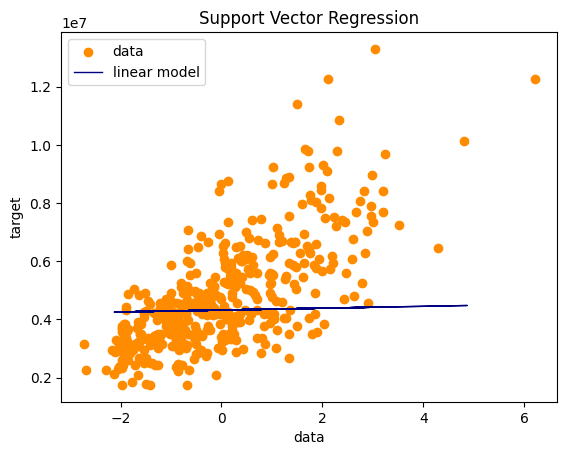

In [50]:
from sklearn.decomposition import PCA
from sklearn import metrics

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(input_matrix_train)
X_test_pca = pca.fit_transform(input_matrix_test)
clf = SVR(kernel='linear', C=1e2)
clf.fit(X_train_pca,y_train)
y_predict = clf.predict(X_test_pca)
loss_lin = metrics.mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {loss_lin}")

lw = 1
plt.scatter(X_train_pca, y_train, color='darkorange', label='data')
plt.plot(X_test_pca, y_predict, color='navy', lw=lw, label='linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [56]:
#different Kernels
# Create a PCA instance and specify the number of components to retain
from sklearn.decomposition import PCA
from sklearn import metrics
losses = []
n_components = 13  # Choose the number of components you want to retain
#classifier = LogisticRegression(random_state=0)
for element in range(1,n_components):
  pca = PCA(n_components=element)
  X_train_pca = pca.fit_transform(input_matrix_train)
  X_test_pca = pca.fit_transform(input_matrix_test)
  clf = SVR(kernel='linear', C=1e2)
  clf.fit(X_train_pca,y_train)
  y_predict = clf.predict(X_test_pca)
  print("Elements: ", element)
  loss_lin = metrics.mean_squared_error(y_test, y_predict)  # Replace y_test with your test labels
  print(f"Mean Squared Error: {loss_lin}")
  losses.append(loss_lin)

Elements:  1
Mean Squared Error: 3501221753145.488
Elements:  2
Mean Squared Error: 3497409751762.389
Elements:  3
Mean Squared Error: 3495830580000.907
Elements:  4
Mean Squared Error: 3496380395268.1475
Elements:  5
Mean Squared Error: 3495701451567.4146
Elements:  6
Mean Squared Error: 3497386498041.7197
Elements:  7
Mean Squared Error: 3497261689327.6577
Elements:  8
Mean Squared Error: 3497255753664.918
Elements:  9
Mean Squared Error: 3497203123782.5796
Elements:  10
Mean Squared Error: 3497361253687.633
Elements:  11
Mean Squared Error: 3497331530208.1494
Elements:  12
Mean Squared Error: 3497331530208.1494


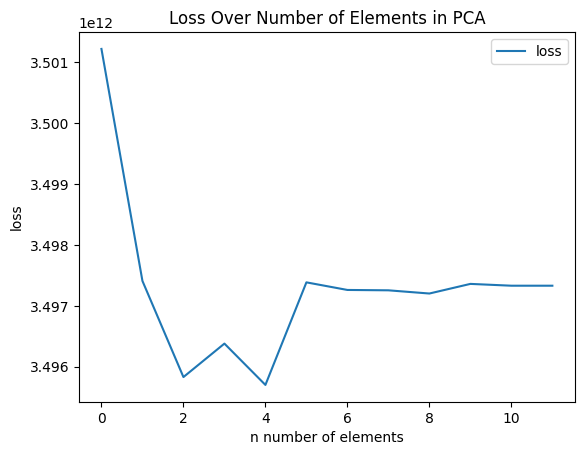

In [51]:
# 4. Plot the training and validation loss after each iteration
plt.plot(losses, label="loss")
plt.xlabel("n number of elements")
plt.ylabel("loss")
plt.legend()
plt.title("Loss Over Number of Elements in PCA")
plt.show()

In [53]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(input_matrix_train)
X_test_pca = pca.fit_transform(input_matrix_test)
#SVR linear
clf_lin = SVR(kernel='linear', C=1e2)
clf_lin.fit(X_train_pca,y_train)
y_predict_lin = clf_lin.predict(X_test_pca)
loss_lin = metrics.mean_squared_error(y_test, y_predict_lin)
print(f"Mean Squared Error: {loss_lin}")
#SVR polynomial
clf_poly = SVR(kernel='poly', C=1e2)
clf_poly.fit(X_train_pca,y_train)
y_predict_poly = clf_poly.predict(X_test_pca)
loss_poly = metrics.mean_squared_error(y_test, y_predict_poly)
print(f"Mean Squared Error: {loss_poly}")
#SVR rbf
clf_rbf = SVR(kernel='rbf', C=1e2)
clf_rbf.fit(X_train_pca,y_train)
y_predict_rbf = clf_rbf.predict(X_test_pca)
loss_rbf = metrics.mean_squared_error(y_test, y_predict_rbf)
print(f"Mean Squared Error: {loss_rbf}")

Mean Squared Error: 3496380395268.1475
Mean Squared Error: 3558464863277.2314
Mean Squared Error: 3623893171624.7593


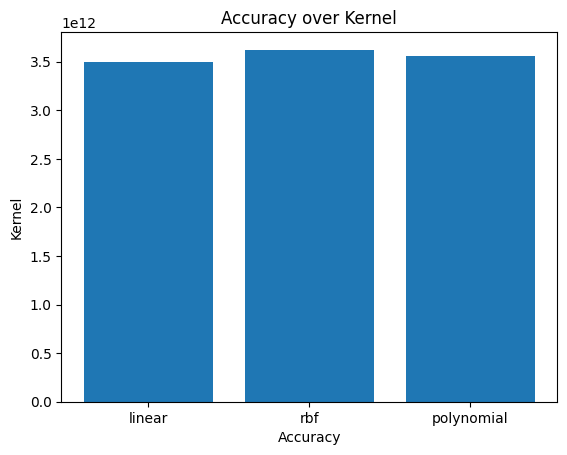

In [55]:
# Plotting accuarcy over different kernels
kernels = ['linear', 'rbf', 'polynomial']
accuarcies = [loss_lin, loss_rbf, loss_poly]

# Create a bar plot
plt.bar(kernels, accuarcies)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Kernel')
plt.title('Accuracy over Kernel')

# Show the plot
plt.show()